<a href="https://colab.research.google.com/github/Himanshilalwani175/Summer_ana_Work/blob/main/Hacakathon1_summer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SUBMITTED BY- HIMANSHI LALWANI
     email: hlalwani1705@gmail.com***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Summary of dataset:
#Dataset
#Each row in the dataset contains:

#class: Ground truth label of the land cover type — one of {Water, Impervious, Farm, Forest, Grass, Orchard}

#ID:Unique identifier for the sample

#27 NDVI Time Points: Columns labeled in the format YYYYMMDD_N (e.g., 20150720_N, 20150602_N) represent NDVI values collected on different dates. These values form a time series representing vegetation dynamics for each location.

In [ ]:
df= pd.read_csv('/content/hacktrain.csv')
df['class'].value_counts()

,count
class,
forest,6159
farm,841
impervious,669
grass,196
water,105
orchard,30


In [ ]:
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,560
20150602_N,1200
20150517_N,800
20150501_N,960
20150415_N,480
20150330_N,1120
20150314_N,720


In [ ]:
df.drop(columns=['ID'],inplace=True)
df

,Unnamed: 0,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,NaN,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


<Axes: >

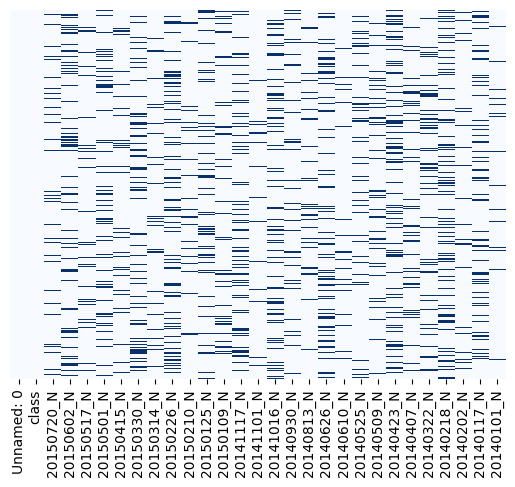

In [ ]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns)
# we cannot skip all the col or rows cause we will end up skipping the whole dataset


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [ ]:
label_encoder = LabelEncoder()
df1 = label_encoder.fit_transform(df['class'])
df['class'] = df1
df.head()


,Unnamed: 0,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,5,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,5,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,5,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,5,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [ ]:
X = df.drop(columns=['class'])
y = df['class']

In [ ]:
imputer = SimpleImputer(strategy='mean') # You can change the strategy (e.g., 'median', 'most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['class'])
y = df_imputed['class']
# %%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100) # Increased max_iter
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79       168
         1.0       0.98      0.99      0.98      1232
         2.0       0.60      0.46      0.52        39
         3.0       0.76      0.84      0.80       134
         4.0       1.00      0.17      0.29         6
         5.0       1.00      0.52      0.69        21

    accuracy                           0.93      1600
   macro avg       0.85      0.63      0.68      1600
weighted avg       0.93      0.93      0.93      1600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
# PREDICTIONS BY LOGISTIC, DT AND RANDOM FOREST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf1= LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
clf2= DecisionTreeClassifier()
clf3= RandomForestClassifier()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 28)
(1600, 28)
(6400,)
(1600,)


In [ ]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [ ]:
y_pred1= clf1.predict(X_test)
#y_pred1= y_pred1.astype(int)
y_pred2= clf2.predict(X_test)
y_pred3= clf3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print('Logistic Regression')
print('train test accuracy: ', accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print('*************************')
print('Decision Tree')
print('train test accuracy: ', accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print('*************************')
print('Random Forest')
print('train test accuracy: ', accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

Logistic Regression
train test accuracy:  0.9325
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79       168
         1.0       0.98      0.99      0.98      1232
         2.0       0.60      0.46      0.52        39
         3.0       0.76      0.84      0.80       134
         4.0       1.00      0.17      0.29         6
         5.0       1.00      0.52      0.69        21

    accuracy                           0.93      1600
   macro avg       0.85      0.63      0.68      1600
weighted avg       0.93      0.93      0.93      1600

*************************
Decision Tree
train test accuracy:  0.964375
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       168
         1.0       1.00      1.00      1.00      1232
         2.0       0.78      0.72      0.75        39
         3.0       0.82      0.89      0.85       134
         4.0       1.00      0.33      0.50         6
         5.0

In [ ]:
df_test= pd.read_csv('/content/hacktest.csv')

df_test

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [ ]:
ID = df_test['ID']
df_test.drop(columns=['ID'],inplace=True)

In [ ]:

y_pred_1= clf1.predict(df_test)
y_pred_1= y_pred_1.astype(int)
y_pred_2= clf2.predict(df_test)
y_pred_2= y_pred_2.astype(int)
y_pred_3= clf3.predict(df_test)
y_pred_3= y_pred_3.astype(int)

print(y_pred_1)
print(y_pred_2)
print(y_pred_3)

[1 1 1 ... 3 3 3]
[1 5 1 ... 5 5 5]
[1 1 1 ... 5 5 5]


In [ ]:

y_lr = label_encoder.inverse_transform(y_pred_1)
y_dt = label_encoder.inverse_transform(y_pred_2)
y_rf = label_encoder.inverse_transform(y_pred_3)
# Use np.unique() for numpy arrays
#print(np.unique(y_lr))

In [ ]:
result = pd.DataFrame({
    'ID':ID,
    'class-LR': y_dt
})
result

,ID,class-LR
0,1,forest
1,2,water
2,3,forest
3,4,water
4,5,forest
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [ ]:
result.to_csv("submission_himanshi_2.csv", index=False)